<a href="https://colab.research.google.com/github/Opeyemiiii/opeyemi_python_and_Machine-learning_project_portfolio/blob/main/Hearth_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, make_scorer, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm

In [ ]:
Hearth_data = pd.read_csv("/content/Heart_Disease_Prediction.csv")
Hearth_data.sample(n = 5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
35,48,1,4,130,256,1,2,150,1,0.0,1,2,7,Presence
201,58,1,4,125,300,0,2,171,0,0.0,1,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence
42,44,1,3,130,233,0,0,179,1,0.4,1,0,3,Absence
137,56,1,4,125,249,1,2,144,1,1.2,2,1,3,Presence


In [ ]:
Hearth_data.shape

(270, 14)

In [ ]:
Hearth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Data Analysis

<ipython-input-7-c5f25c80fc39>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hearth_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

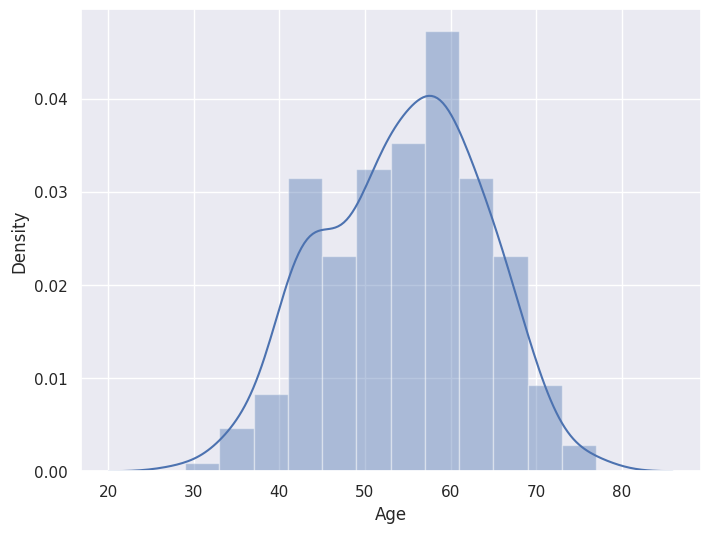

In [ ]:
sns.set()

plt.figure(figsize = (8,6))
sns.distplot(Hearth_data['Age'])

<ipython-input-8-fbddfcfe0bfb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hearth_data['BP'])


<Axes: xlabel='BP', ylabel='Density'>

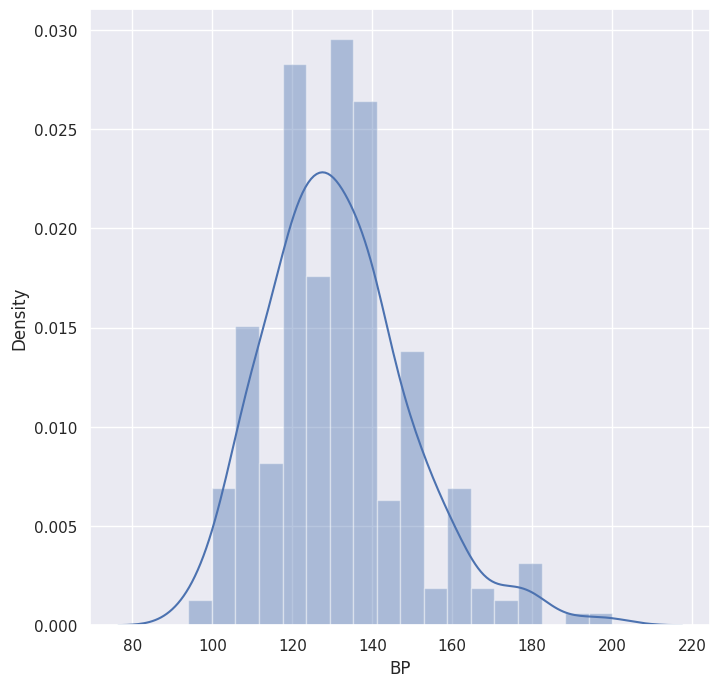

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(Hearth_data['BP'])

<ipython-input-9-952a0e0190b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Hearth_data['Cholesterol'])


<Axes: xlabel='Cholesterol', ylabel='Density'>

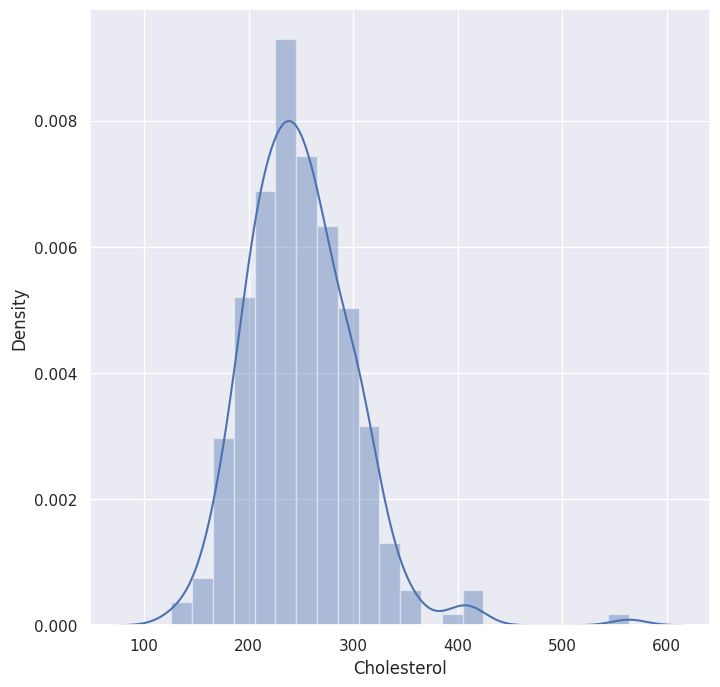

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(Hearth_data['Cholesterol'])

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(Hearth_data['Sex'], hue = Hearth_data['Heart Disease'], data = Hearth_data, palette = 'PuRd')

TypeError: countplot() got multiple values for argument 'data'

<Figure size 800x800 with 0 Axes>

In [ ]:
Hearth_data['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

<Axes: xlabel='count', ylabel='Heart Disease'>

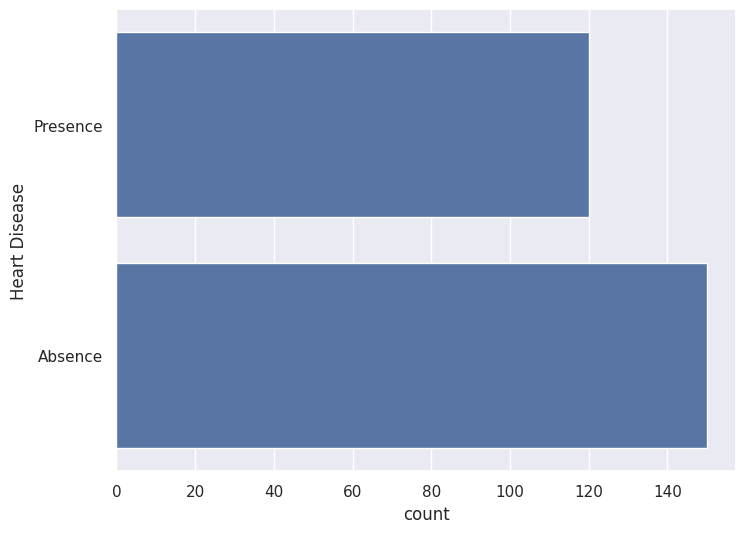

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(Hearth_data['Heart Disease'])

In [ ]:
Hearth_data['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [ ]:
Hearth_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


PREPROCESSING

In [ ]:
Encoder = LabelEncoder()
Hearth_data['Heart Diseases'] = Encoder.fit_transform(Hearth_data['Heart Disease'])

In [ ]:
Hearth_data_dict = dict(zip(Hearth_data['Heart Disease'], Hearth_data['Heart Diseases']))
Hearth_data_dict

{'Presence': 1, 'Absence': 0}

In [ ]:
x = Hearth_data.drop(columns = ['Heart Disease', 'Heart Diseases'])
y = Hearth_data['Heart Diseases']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

STANDARDIZATION

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.std(), x_test.std())

1.0 0.9171214385463259


Modelling

In [ ]:
f1 = make_scorer(f1_score, average = 'weighted')

In [ ]:
params = {'n_neighbors' : range(0,99)}

In [ ]:
gridsearch = GridSearchCV(KNeighborsClassifier(), param_grid= params, scoring = f1, cv = 5 )

In [ ]:
gridsearch.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(0, 99)},
             scoring=make_scorer(f1_score, average=weighted))

In [ ]:
gridsearch.best_params_

{'n_neighbors': 29}

In [ ]:
model = KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
def model_test(train_data, labels):
  KNeighborsClassifier(train_data, labels)



In [ ]:
#model_test(x_train, y_train)

Accuracy

In [ ]:
def classification_task(estimator, features, labels):
  prediction = estimator.predict(features)

  print(f'accuracy : {accuracy_score(labels, prediction)}')
  print(f"f1_score : {f1_score(labels, prediction, average = 'weighted')}")
  print(f"precision : {precision_score(labels, prediction, average = 'weighted')}")
  print(f'recall_score : {recall_score(labels, prediction)}')

In [ ]:
classification_task(svm_model, x_train, y_train)



accuracy : 0.9305555555555556
f1_score : 0.9302697759487883
precision : 0.931982905982906
recall_score : 0.8877551020408163


In [ ]:
classification_task(svm_model, x_test, y_test)

accuracy : 0.7592592592592593
f1_score : 0.7600235155790711
precision : 0.7613111007220404
recall_score : 0.7272727272727273


<Axes: >

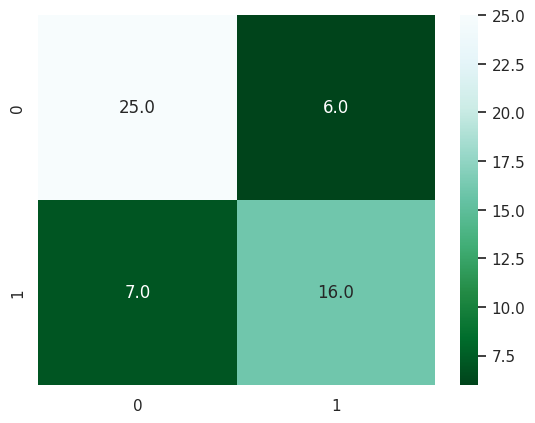

In [ ]:
cmt = confusion_matrix(svm_model.predict(x_test), y_test)
axl = sns.heatmap(cmt, cmap = 'BuGn_r', annot = True, fmt ='.1f')
axl

In [ ]:
input_data = (74, 0, 2, 120, 269, 0, 2, 121, 1, 0.2, 1, 1, 3)

input_data_array = np.asarray(input_data)
input_data = input_data_array.reshape(1, -1)

prediction = svm_model.predict(input_data)

if prediction == 1:
  print('There is a precense of Hearth Disease')
else:
  print('There is an absence of Hearth Disease')

There is an absence of Hearth Disease


In [ ]:
import pickle

file_name = 'Hearth_disease_model.sav'
pickle.dump(svm_model, open(file_name, 'wb'))

In [ ]:
Hearth_disease_model = pickle.load(open('Hearth_disease_model.sav', 'rb'))

In [ ]:
file_name2 = 'Hearth_disease_svm_model.sav'
pickle.dump(svm_model, open(file_name2, 'wb'))

In [ ]:
Hearth_disease_svm_model = pickle.load(open('Hearth_disease_svm_model.sav', 'rb'))

In [ ]:
#class model_task:
 # def __init__(self, model1, model2):
  #  self.model1 = model1
   # self.model2 = model2

def randomforest_model(feature, label):
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score, f1_score
  model = RandomForestClassifier()
  if (feature, label)  == (x_train, y_train):
    model = model.fit(feature, label)
  elif (feature, label)  == (x_test, y_test):
       prediction = model.predict(feature)
  else:
    strain = 'does not have alignment'
    print(strain)

    print(f'Accuracy : {accuracy_score(prediction, label)}')
    print(f'f1_score : {f1_score(prediction, label)}')







In [ ]:
input_data = (74, 0, 2, 120, 269, 0, 2, 121, 1, 0.2, 1, 1, 3)

input_data_array = np.asarray(input_data)
input_data = input_data_array.reshape(1, -1)

prediction = Hearth_disease_model.predict(input_data)

if prediction == 1:
  print('There is a precense of Hearth Disease')
else:
  print('There is an absence of Hearth Disease')

There is an absence of Hearth Disease
